#**Generative Deep Learning**

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

NUM_CLASSES = 10

x_train = x_train.astype('float32') / 225.0
x_test = x_test.astype('float32') / 225.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

####**Implementing with Sequential API**

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential([
  Dense(200, activation = 'relu', input_shape = (32,32,3)),
  Flatten(),
  Dense(150, activation = 'relu'),
  Dense(10, activation = 'softmax')
])

####**Implementing with Functional API**

In [3]:
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model

input_layer = Input(shape=(32,32,3))

x = Flatten()(input_layer)

x = Dense(units = 200, activation = 'relu')(x)
x = Dense(units = 150, activation = 'relu')(x)

output_layer = Dense(units = 10, activation = 'softmax')(x)

model = Model(input_layer, output_layer)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_4 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


####**Activation function can be defined as independent layer**

In [4]:
# x = Dense(units = 200)(x)
# x = Activation('relu')(x)

# is same with

# x = Dense(units = 200, activation = 'relu')

In [5]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer = opt, metrics=['accuracy'])

In [6]:
model.fit(x_train, y_train, batch_size = 32, epochs = 10, shuffle = True)

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.9773 - accuracy: 0.2840
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6805 - accuracy: 0.3978
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6175 - accuracy: 0.4215
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5431 - accuracy: 0.4500
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5011 - accuracy: 0.4668
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4726 - accuracy: 0.4727
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4490 - accuracy: 0.4835
Epoch 8/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4332 - accuracy: 0.4910
Epoch 9/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4043 - accuracy: 0.5026
Epoch 10/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.393

In [7]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4550 - accuracy: 0.4885


[1.454983115196228, 0.4884999990463257]

In [8]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

AttributeError: ignored

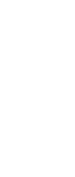

In [9]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4, wspace = 0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.test(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize = 10, ha = 'center', transform=ax.transAxes)
    ax.test(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize = 10, ha = 'center', transform=ax.transAxes)
    ax.imshow(img)

In [10]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation

input_layer = Input(shape=(64,64,1))

conv_layer_1 = Conv2D(
    filters = 2,
    kernel_size = (3,3),
    strides = 1,
    padding = 'same'
)(input_layer)

In [11]:
input_layer = Input(shape=(32,32,3))

conv_layer_1 = Conv2D(
    filters = 10,
    kernel_size = (4,4),
    strides = 2,
    padding = 'same'
)(input_layer)

conv_layer_2 = Conv2D(
    filters = 0,
    kernel_size = (3,3),
    strides = 2,
    padding= 'same'
)(conv_layer_1)

flatten_layer = Flatten()(conv_layer_2)

output_layer = Dense(units = 10, activation='softmax')(flatten_layer)

model = Model(input_layer, output_layer)

In [ ]:
#BatchNormalization(momentum = 0.9)

In [ ]:
#Dropout(rate = 0.25)

In [16]:
input_layer = Input((32,32,3))

x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)
model = Model(input_layer, output_layer)

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 32)        0   

In [17]:
model.compile(loss='categorical_crossentropy', optimizer = opt, metrics=['accuracy'])

model.fit(x_train, y_train, batch_size = 32, epochs = 10, shuffle = True)

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.8074 - accuracy: 0.3845
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1872 - accuracy: 0.5822
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0061 - accuracy: 0.6465
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9056 - accuracy: 0.6844
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8513 - accuracy: 0.7038
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7971 - accuracy: 0.7217
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7566 - accuracy: 0.7340
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7113 - accuracy: 0.7535
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6704 - accuracy: 0.7668
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.63

In [18]:
model.evaluate(x_test, y_test, batch_size = 100)

100/100 [==============================] - 1s 5ms/step - loss: 0.8926 - accuracy: 0.7033


[0.892620325088501, 0.7032999992370605]

In [13]:
#from models.AE import Autoencoder
#from AE import Autoencoder

AE = Autoencoder(
    input_dim= (28,28,1)
    , encoder_conv_filters=[32,64,64,64]
    , encoder_conv_kernel_size = [3,3,3,3]
    , encoder_conv_strides = [1,2,2,1]
    , decoder_conv_t_filters = [64,64,32,1]
    , decoder_conv_t_kernel_size = [3,3,3,3]
    , decoder_conv_t_strides = [1,2,2,1]
    , z_dim = 2
)

NameError: ignored